**Logistic regression**

# **Data Pre-Processing**

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets For Machine Learning/diabetes_two (1).csv')
#df.head()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [108]:
df.isnull().sum() #finding null values

,0
Age,1
Gender,1
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,1
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [109]:
df['weakness']

,weakness
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
515,No
516,Yes
517,Yes
518,Yes


In [110]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  #Handling null values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['weakness'] = df['weakness'].fillna(df['weakness'].mode().iloc[0])

In [111]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [112]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [113]:
df['Gender'] = le.fit_transform(df['Gender']) # converting the categorical data into numerical
df['Polyuria'] = le.fit_transform(df['Polyuria'])
df['Polydipsia'] = le.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = le.fit_transform(df['sudden weight loss'])
df['weakness'] = le.fit_transform(df['weakness'])
df['Polyphagia'] = le.fit_transform(df['Polyphagia'])
df['Genital thrush'] = le.fit_transform(df['Genital thrush'])
df['visual blurring'] = le.fit_transform(df['visual blurring'])
df['Itching'] = le.fit_transform(df['Itching'])
df['Irritability'] = le.fit_transform(df['Irritability'])
df['delayed healing'] = le.fit_transform(df['delayed healing'])
df['partial paresis'] = le.fit_transform(df['partial paresis'])
df['muscle stiffness'] = le.fit_transform(df['muscle stiffness'])
df['Alopecia'] = le.fit_transform(df['Alopecia'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['class'] = le.fit_transform(df['class'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [115]:
#Handling outliers
z_score =(df['Age'] - df["Age"].mean())/df['Age'].std()
for i in z_score:
  if i<-3 or i>3:
    print("You have outlier",i)
    o_val = i
  else:
    continue

index = z_score.index[z_score == o_val][0]
df['Age'][index]

You have outlier 20.34563622506856


np.float64(600.0)

In [116]:
df["Age"][index] = df['Age'].mean()

<ipython-input-116-9fa035bd217d>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Age"][index] = df['Age'].mean()
<ipython-input-116-9fa035bd217d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [117]:
df['Age'][index]

np.float64(49.08285163776493)

In [118]:
#Handling duplicates
duplicates = df[df.duplicated(keep="first")]
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35.0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53.0,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68.0,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64.0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [119]:
df = df.drop_duplicates()

In [120]:
duplicates = df[df.duplicated(keep="first")]
duplicates

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


In [121]:
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

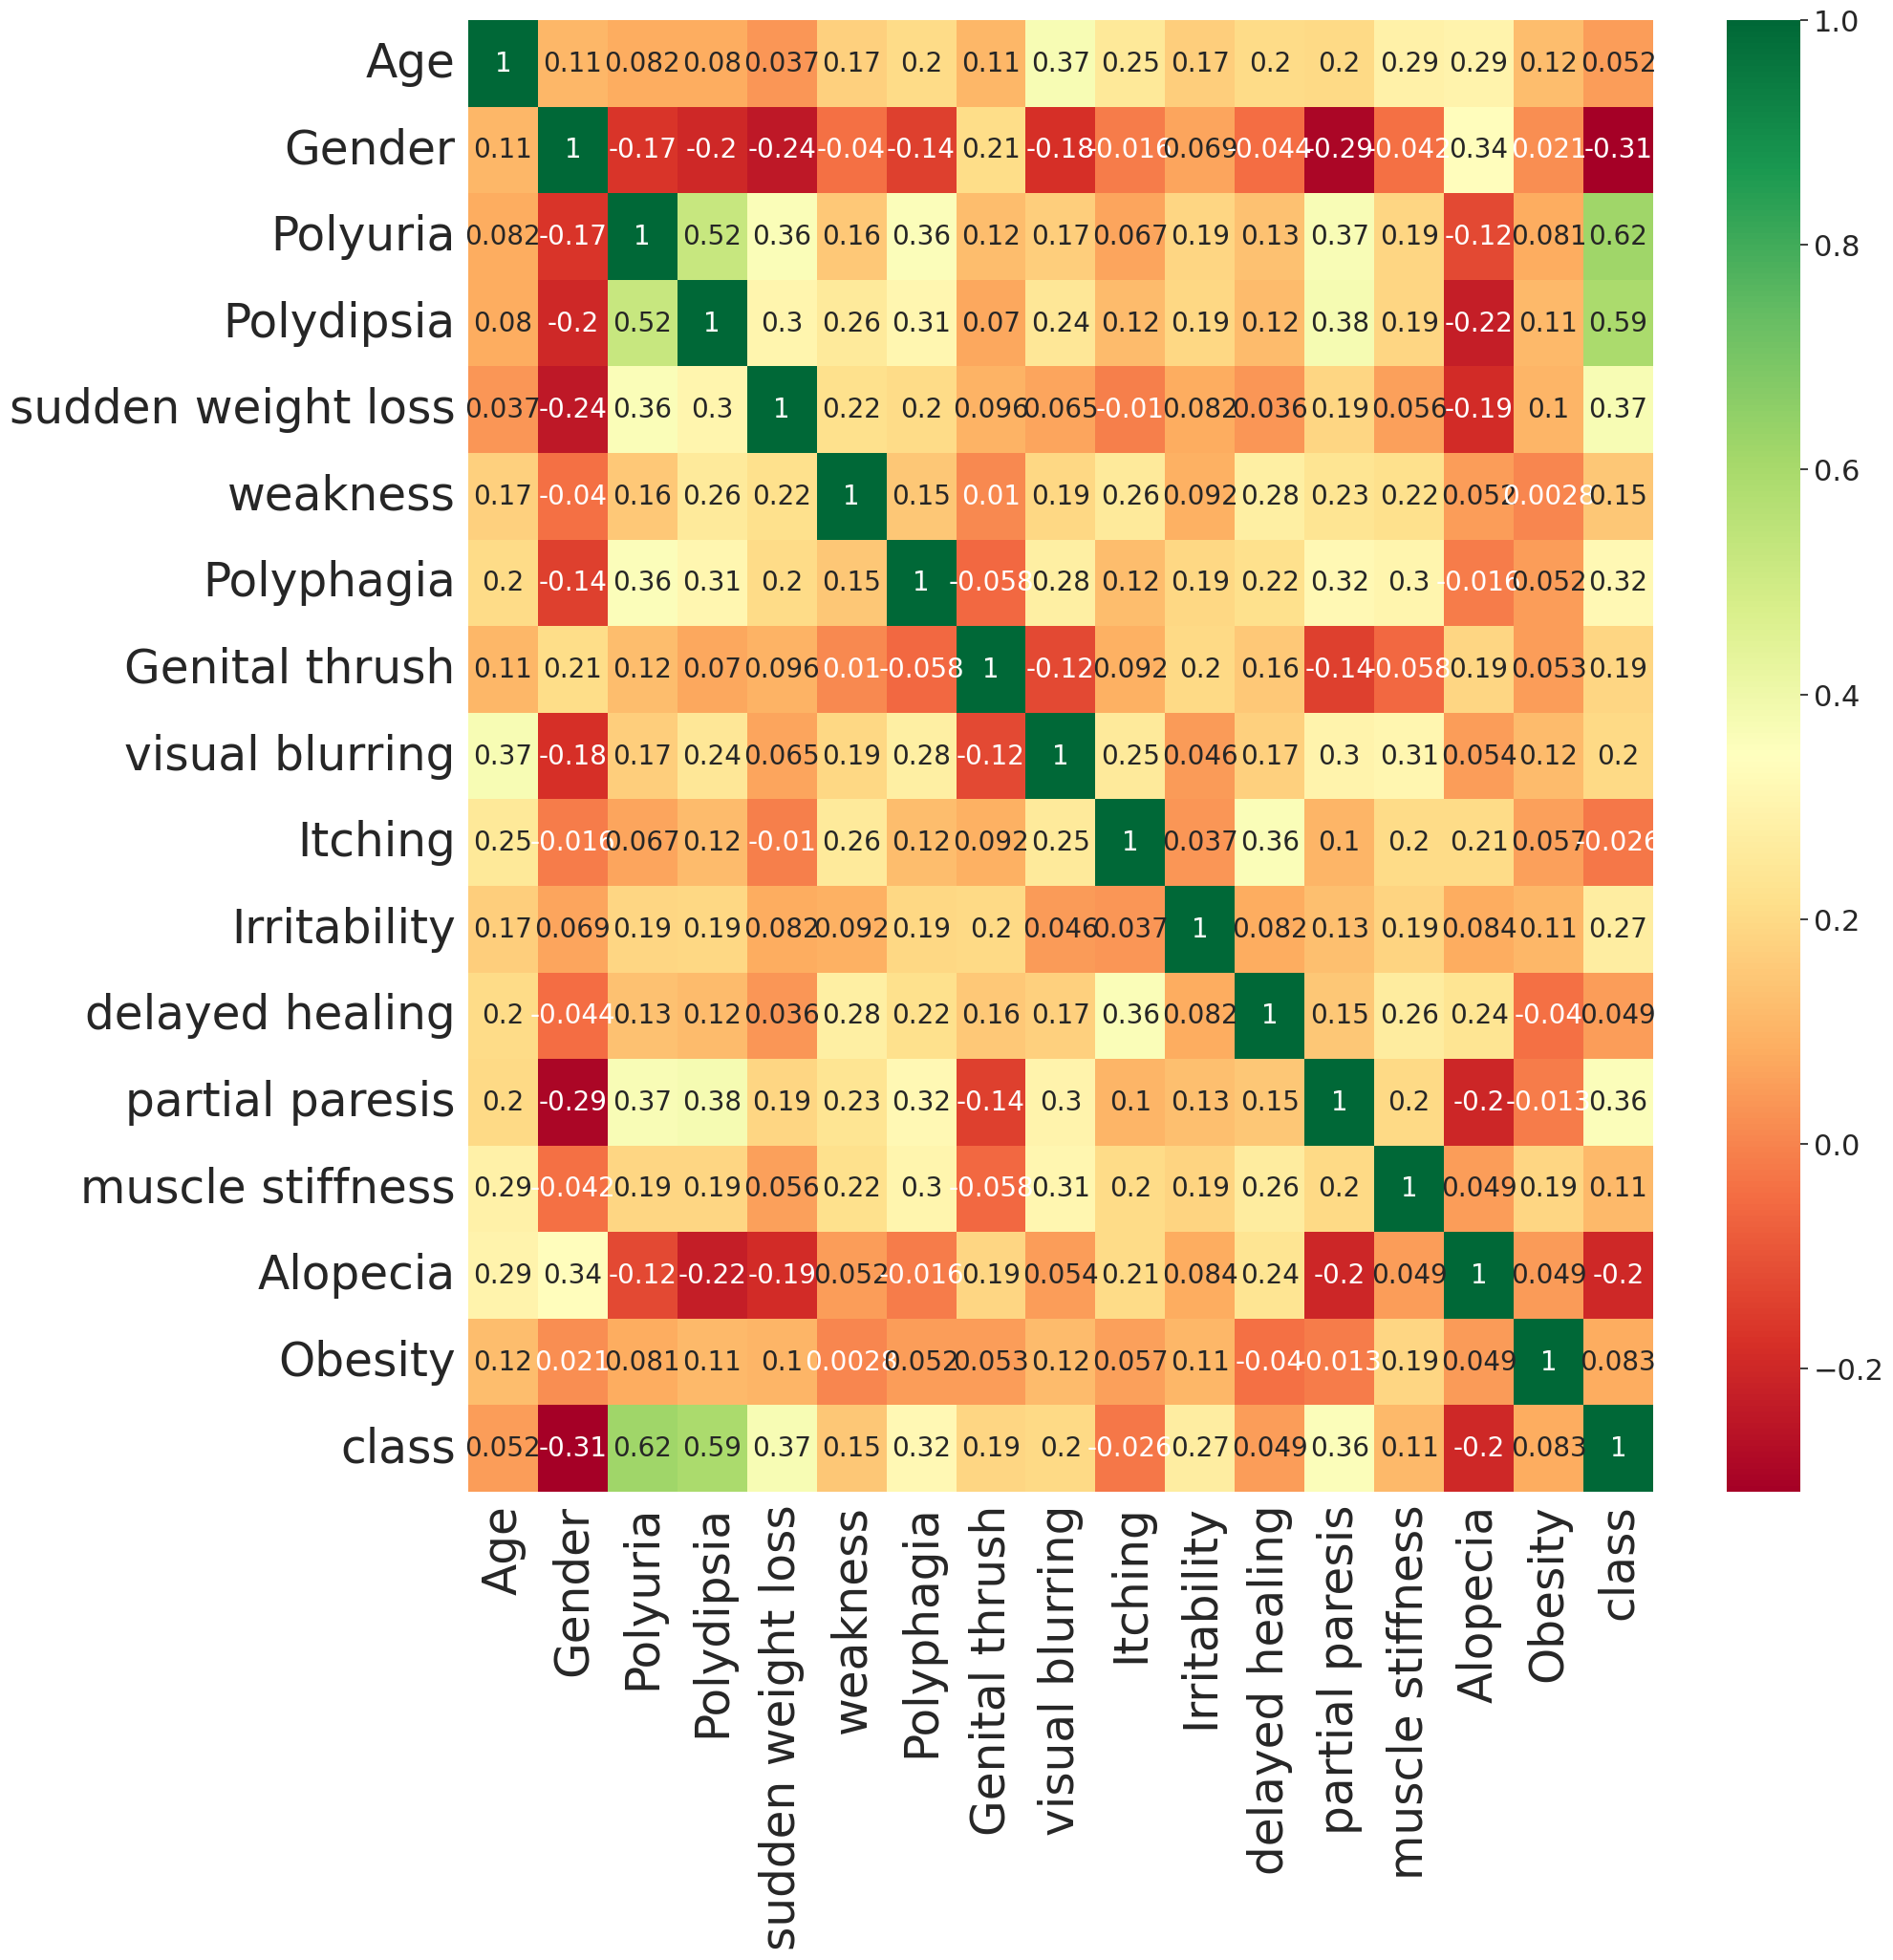

In [122]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot=sns.heatmap(df.corr(method='pearson'),annot=True,cmap='RdYlGn',annot_kws={'size':20}) #Pearson correlation / heatmap

plt.yticks(fontsize =35) # font size of y axis
plt.xticks(fontsize =35) # font size of x axis

plt.show()

We can opt out itching

In [123]:
df.dropna(subset=['Itching'],inplace = True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 251 non-null    float64
 1   Gender              251 non-null    int64  
 2   Polyuria            251 non-null    int64  
 3   Polydipsia          251 non-null    int64  
 4   sudden weight loss  251 non-null    int64  
 5   weakness            251 non-null    int64  
 6   Polyphagia          251 non-null    int64  
 7   Genital thrush      251 non-null    int64  
 8   visual blurring     251 non-null    int64  
 9   Itching             251 non-null    int64  
 10  Irritability        251 non-null    int64  
 11  delayed healing     251 non-null    int64  
 12  partial paresis     251 non-null    int64  
 13  muscle stiffness    251 non-null    int64  
 14  Alopecia            251 non-null    int64  
 15  Obesity             251 non-null    int64  
 16  class        

In [125]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,49.082852,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,49.082852,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.000000,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.000000,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.000000,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.000000,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [126]:
# Shuffling the dataset
from sklearn.utils import shuffle
df = shuffle(df)

In [127]:
#re-arranging the index values
df = df.reset_index(drop=True)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,68.0,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
1,30.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,54.0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1
3,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31.0,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,54.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,60.0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1
248,70.0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1
249,61.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [128]:
#Separating feature and Target
x = df.drop(columns=['class'])
y = df['class']

In [129]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x = mmc.fit_transform(x)

In [130]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [131]:
print("train data size (features):",len(x_train))
print("train data size (target):",len(y_train))

print("test data size (features):",len(x_test))
print("test data size (target):",len(y_test))

train data size (features): 200
train data size (target): 200
test data size (features): 51
test data size (target): 51


# **Model**

In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2',tol = 0.0001,solver = 'liblinear', max_iter = 100, multi_class = 'auto')

**Hyper parameters**
penalty - specify the norm of penalty  
tol - how much loss is accepted  
solver - algorithm for optimization  
max_iter - how many iteration for optimization  
multi_class - specify how many classification is needed

In [135]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [136]:
pred_values = model.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**All of these are needed to evaluate classification promblem**

In [139]:
accuracy = accuracy_score(y_test,pred_values)
precision = precision_score(y_test,pred_values)
recall = recall_score(y_test,pred_values)
f1 = f1_score(y_test,pred_values)
AUC = roc_auc_score(y_test,pred_values) # area under the curve

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)
print("AUC:",AUC)

Accuracy: 0.8235294117647058
Precision: 0.9393939393939394
Recall: 0.8157894736842105
F1: 0.8732394366197183
AUC: 0.8309716599190283


**ROC Curve**

In [141]:
roc_score = model.predict_proba(x_test)[:,1] #not actual predict value, predict probabilty
fpr,tpr,thresholds = roc_curve(y_test,roc_score)
#fpr - false positive rate
#tpr - true positive rate
#threshold - related to the increase in fpr while trying to increase tpr

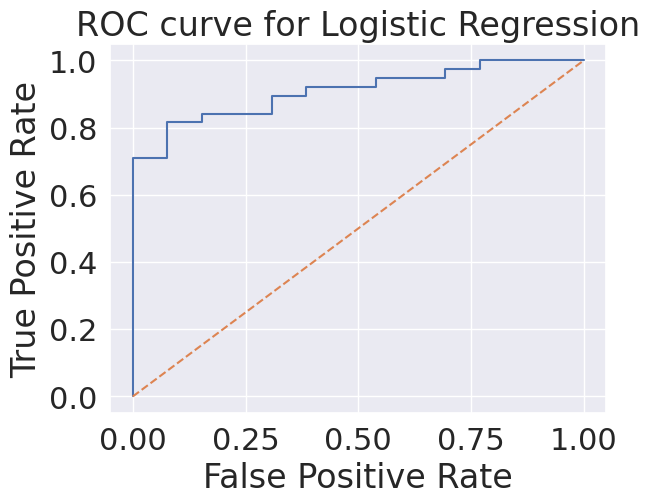

In [142]:
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--") # dotted line through the center
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()